# Homework 2 - Soccer analytics


## Libraries

In [2]:
#We import the necessary libraries to organize data and plot the Premier League ranking 2017/2018.
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data

In [3]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Spain.json', 'r') as file:
    data = file.read()
matches = json.loads(data)
matches = pd.DataFrame(matches)


In [4]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\teams.json', 'r') as teams:
    data = teams.read()
teams = json.loads(data)
teams = pd.DataFrame(teams)


In [5]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\players.json', 'r') as myfile:
    data = myfile.read()
play = json.loads(data)
players = pd.DataFrame(play)


In [6]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\coaches.json', 'r') as myfile:
    data = myfile.read()
co = json.loads(data)
coaches = pd.DataFrame(co)

# Exploratory Data Analysis
All the analysis from RQ1 to RQ5, are performed only over the Premier League dataset.

# [RQ1] Who wants to be a Champion?


### Create a plot where each point (x,y) represents the number of points obtained by team x at game week y.
For this task, we need the dataframes matches and teams.
In this exploratory data analysis (RQ1 - RQ5), we will use only the datasets relative to the La Liga season 2017/2018.

We load the 'matches_Spain' and 'teams' json files, and produce the pandas dataframe

In [7]:
matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,795,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Barcelona - Real Sociedad, 1 - 0","[{'refereeId': 398931, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",Camp Nou,676,2565922
1,795,"May 20, 2018 at 6:30:00 PM GMT+2",2018-05-20 16:30:00,Regular,38,"Atl\u00e9tico Madrid - Eibar, 2 - 2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",Estadio Wanda Metropolitano,0,2565925
2,795,"May 20, 2018 at 4:15:00 PM GMT+2",2018-05-20 14:15:00,Regular,38,"Athletic Club - Espanyol, 0 - 1","[{'refereeId': 384957, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",San Mam\u00e9s Barria,691,2565919
3,795,"May 20, 2018 at 12:00:00 PM GMT+2",2018-05-20 10:00:00,Regular,38,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","[{'refereeId': 398913, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",Estadio de Mestalla,674,2565924
4,795,"May 19, 2018 at 8:45:00 PM GMT+2",2018-05-19 18:45:00,Regular,38,"Villarreal - Real Madrid, 2 - 2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",Estadio de la Cer\u00e1mica,0,2565927


In [8]:
teams.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


#### Create a dataframe of all the La Liga League teams
We will produce a new dataframe 'spanish' from 'teams' to get rid of all the useless information, keeping only the rows with area tag {'name': 'Spain'}

In [9]:
spanish = teams[teams['area'] == {"name": "Spain", "id": "724", "alpha3code": "ESP", "alpha2code": "ES"}]
spanish.head()

,area,city,name,officialName,type,wyId
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695
6,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Getafe (Madrid),Getafe,Getafe Club de F\u00fatbol,club,698


In [11]:
len(spanish.index) #Counting the rows

20

We create a dataframe with only the columns 'name' and 'wyId', that are what we need to complete our task.

In [13]:
Spainteam = pd.DataFrame(spanish['name'])
Spainteam['code'] = spanish['wyId']
Spainteam = Spainteam.sort_values('code') #sorting values by 'code'
Spainteam = Spainteam.reset_index(drop=True) #reindexing

Spainteam.head()

,name,code
0,Valencia,674
1,Real Madrid,675
2,Barcelona,676
3,Deportivo La Coru\u00f1a,677
4,Athletic Club,678


From the dataframe 'matches' we only need the 'gameweek' and 'winner' columns, so we create the Liga dataframe.

In [14]:
Liga = pd.DataFrame(matches['gameweek'])
Liga['winner'] = matches['winner']
Liga['result'] = matches['label']
Liga = Liga.sort_values('gameweek')
Liga = Liga.reset_index(drop=True)

Liga[:8]

,gameweek,winner,result
0,1,712,"Legan\u00e9s - Deportivo Alav\u00e9s, 1 - 0"
1,1,701,"M\u00e1laga - Eibar, 0 - 1"
2,1,695,"Levante - Villarreal, 1 - 0"
3,1,675,"Deportivo La Coru\u00f1a - Real Madrid, 0 - 3"
4,1,676,"Barcelona - Real Betis, 2 - 0"
5,1,674,"Valencia - Las Palmas, 1 - 0"
6,1,0,"Sevilla - Espanyol, 1 - 1"
7,1,0,"Girona - Atl\u00e9tico Madrid, 2 - 2"


So in the 'gameweek' column we can see the week where the match was disputed, and in 'winner' the wyId code of the winning team. It's worth of notice that if there's a draw the code value is 0.

#### Creating the ranking with all the points of each team during the 38 weeks of the season.

We start by adding 38 week columns to the Spainteam dataframe.

In [142]:
for i in range(1,39):
    Spainteam['week {}'.format(i)] = 0
Spainteam.head()

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Valencia,674,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Real Madrid,675,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barcelona,676,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Deportivo La Coru\u00f1a,677,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Athletic Club,678,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Creating copy dataframes to avoid damaging the original ones
E = Spainteam.copy()
P = Liga.copy()

Now we are ready to complete the E dataframe with all the results.

In [19]:
for i in range(380): #There are 380 total matches in the league.
    if P['winner'][i] != 0: #If there is not a draw
        
        #Adding 3 as value if the wyId code is the same as the 'winner' code in P
        E.loc[E['code'] == P['winner'][i], ['week {}'.format(P['gameweek'][i])]] = 3
        
    else:
        for j in range(20):
            
            if E['name'][j] in P['result'][i]:#If the team name is in the 'result' value
                E.at[j, 'week {}'.format(P['gameweek'][i])] = 1
E

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Valencia,674,3,1,1,1,3,3,3,3,...,3,3,3,0,0,1,1,0,3,3
1,Real Madrid,675,3,1,1,3,0,3,3,3,...,3,3,1,3,1,0,3,1,3,1
2,Barcelona,676,3,3,3,3,3,3,3,1,...,3,1,3,3,1,3,3,1,0,3
3,Deportivo La Coru\u00f1a,677,0,1,0,0,3,0,3,1,...,1,0,3,3,1,1,0,1,0,0
4,Athletic Club,678,1,3,3,0,0,1,0,3,...,0,1,3,0,1,0,0,3,0,0
5,Atl\u00e9tico Madrid,679,1,3,1,3,3,3,1,1,...,0,3,1,3,0,1,3,0,3,1
6,Sevilla,680,1,3,3,3,3,0,3,0,...,0,1,0,1,1,3,0,3,1,3
7,Villarreal,682,0,0,3,3,1,0,3,3,...,3,0,0,1,3,0,3,3,3,1
8,M\u00e1laga,683,0,0,0,0,0,1,0,0,...,1,3,0,0,0,3,0,0,0,0
9,Real Betis,684,0,3,0,3,3,3,1,0,...,3,3,3,3,3,1,3,0,1,0


#### Creating the plot

In [20]:
E = E.loc[:, 'week 1':] #we remove the 'names' and 'code' columns, we don't need them anymore


Now, we need to list of the result of each team so that we can sum them and plot the summed result of each team.

In [21]:
Graf = E.values.tolist()
Grafv = list(Graf)


In [22]:
for i in range(20):
    for j in range(1,38):
        Grafv[i][j] = Graf[i][j-1] + Graf[i][j] #Summing every week result with the past ones


We can finally plot. 

In [23]:
wg = []
for i in range(1,39):
    wg.append('{}'.format(i)) # x ticks of every week

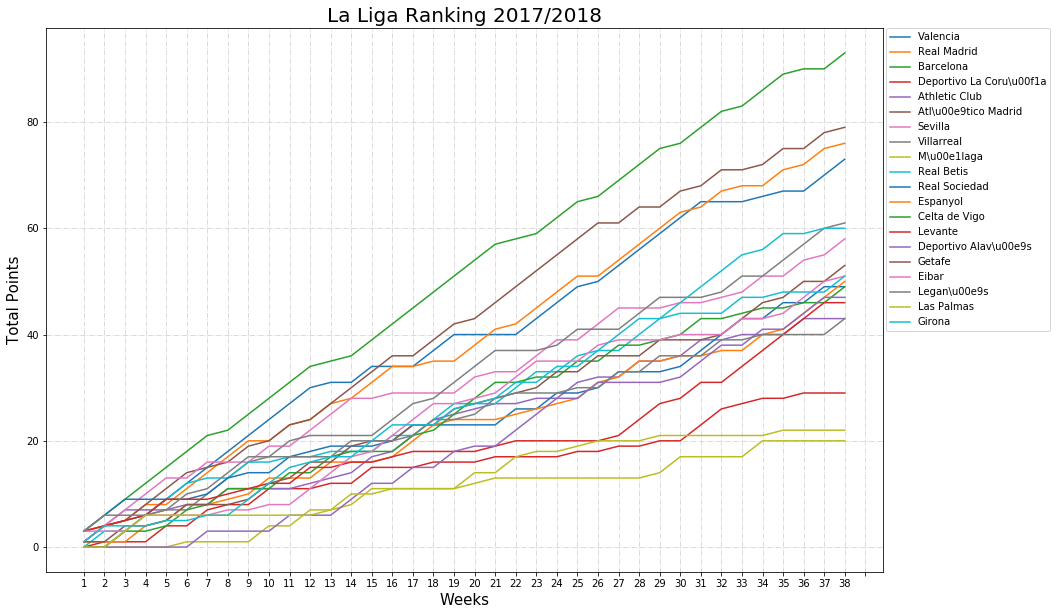

In [143]:
plt.figure(figsize=(15,10))
for i in range(20):
    plt.plot(Grafv[i], label = Spainteam['name'][i])
    
plt.xticks(range(0,39),wg, size = 10)
plt.ylabel("Total Points", size = 15)
plt.xlabel("Weeks", size = 15)
plt.grid(color ='lightgray', linestyle = '-.')
plt.title('La Liga Ranking 2017/2018', size = 20)

plt.legend(loc='center right',bbox_to_anchor=(1.20,0.7211), borderaxespad=0,prop={'size': 10});

#### Finding the two best and worst teams

We now define a function to find the teams with most consecutive wins and losses. 

In [26]:
def bestornot(n):
    r = E.values.tolist()
    for i in range(len(r)):
        r[i] = [str(x) if x == n else ' ' for x in r[i]] #everything different from n becomes a space ' '
        r[i] = ''.join(r[i])#getting rid of spaces
        r[i] = r[i].split()#creating the list r[i] modified
        r[i] = max(r[i])#choosing the max value in r[i]
    
    return r


In [27]:
bestornot(3)#most consecutive wins for team in the season

['33333333',
 '3333',
 '3333333',
 '33',
 '33',
 '333333',
 '3333',
 '333',
 '3',
 '333333',
 '333',
 '333',
 '333',
 '33333',
 '333',
 '33',
 '333',
 '33',
 '33',
 '333']

In [28]:
Spainteam.at[0, 'name']#best team

'Valencia'

In [29]:
Spainteam.at[2, 'name']#second best

'Barcelona'

Now, we can do the same with losses:

In [31]:
bestornot(0)#most consecutive losses for team in the season

['000',
 '0',
 '0',
 '000',
 '000',
 '0',
 '000',
 '000',
 '0000000',
 '00',
 '0000',
 '00',
 '00',
 '0000',
 '000000',
 '00',
 '000',
 '0000',
 '00000000',
 '00']

In [36]:
Spainteam.at[18,'name']#worst team

'Las Palmas'

In [37]:
Spainteam.at[8,'name']#second worst

'M\\u00e1laga'

# [RQ2] Is there a home-field advantage?

In [38]:
matches
#let's watch our dataframe

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,795,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Barcelona - Real Sociedad, 1 - 0","[{'refereeId': 398931, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",Camp Nou,676,2565922
1,795,"May 20, 2018 at 6:30:00 PM GMT+2",2018-05-20 16:30:00,Regular,38,"Atl\u00e9tico Madrid - Eibar, 2 - 2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",Estadio Wanda Metropolitano,0,2565925
2,795,"May 20, 2018 at 4:15:00 PM GMT+2",2018-05-20 14:15:00,Regular,38,"Athletic Club - Espanyol, 0 - 1","[{'refereeId': 384957, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",San Mam\u00e9s Barria,691,2565919
3,795,"May 20, 2018 at 12:00:00 PM GMT+2",2018-05-20 10:00:00,Regular,38,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","[{'refereeId': 398913, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",Estadio de Mestalla,674,2565924
4,795,"May 19, 2018 at 8:45:00 PM GMT+2",2018-05-19 18:45:00,Regular,38,"Villarreal - Real Madrid, 2 - 2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",Estadio de la Cer\u00e1mica,0,2565927
5,795,"May 19, 2018 at 6:30:00 PM GMT+2",2018-05-19 16:30:00,Regular,38,"Sevilla - Deportivo Alav\u00e9s, 1 - 0","[{'refereeId': 379388, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'696': {'scoreET': 0, 'coachId': 230918, 'sid...",Estadio Ram\u00f3n S\u00e1nchez Pizju\u00e1n,680,2565920
6,795,"May 19, 2018 at 6:30:00 PM GMT+2",2018-05-19 16:30:00,Regular,38,"M\u00e1laga - Getafe, 0 - 1","[{'refereeId': 398919, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'698': {'scoreET': 0, 'coachId': 4107, 'side'...",Estadio La Rosaleda,698,2565921
7,795,"May 19, 2018 at 6:30:00 PM GMT+2",2018-05-19 16:30:00,Regular,38,"Las Palmas - Girona, 1 - 2","[{'refereeId': 381854, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'714': {'scoreET': 0, 'coachId': 4258, 'side'...",Estadio de Gran Canaria,756,2565923
8,795,"May 19, 2018 at 4:15:00 PM GMT+2",2018-05-19 14:15:00,Regular,38,"Legan\u00e9s - Real Betis, 3 - 2","[{'refereeId': 381927, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'684': {'scoreET': 0, 'coachId': 0, 'side': '...",Estadio Municipal de Butarque,712,2565926
9,795,"May 19, 2018 at 1:00:00 PM GMT+2",2018-05-19 11:00:00,Regular,38,"Celta de Vigo - Levante, 4 - 2","[{'refereeId': 395078, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'692': {'scoreET': 0, 'coachId': 3880, 'side'...",Estadio de Bala\u00eddos,692,2565918


In [39]:
matches.columns

Index(['competitionId', 'date', 'dateutc', 'duration', 'gameweek', 'label',
       'referees', 'roundId', 'seasonId', 'status', 'teamsData', 'venue',
       'winner', 'wyId'],
      dtype='object')

In [40]:
workingData = matches['label']
workingData.head()
#we are interested in label because it gives the info of the teams that were playing and the result of the game

0              Barcelona - Real Sociedad, 1 - 0
1           Atl\u00e9tico Madrid - Eibar, 2 - 2
2               Athletic Club - Espanyol, 0 - 1
3    Valencia - Deportivo La Coru\u00f1a, 2 - 1
4               Villarreal - Real Madrid, 2 - 2
Name: label, dtype: object

I will split this columns in teams and result to have a better view and accessibility of the info in every row.

In [41]:
wkd = pd.DataFrame(workingData)
wkd.head()

,label
0,"Barcelona - Real Sociedad, 1 - 0"
1,"Atl\u00e9tico Madrid - Eibar, 2 - 2"
2,"Athletic Club - Espanyol, 0 - 1"
3,"Valencia - Deportivo La Coru\u00f1a, 2 - 1"
4,"Villarreal - Real Madrid, 2 - 2"


In [42]:
new = wkd["label"].str.split(",", n = 1, expand = True)
new.head()
#we created a table with the match and the result, now we can split for HomeMatch and NotHomeMatch

,0,1
0,Barcelona - Real Sociedad,1 - 0
1,Atl\u00e9tico Madrid - Eibar,2 - 2
2,Athletic Club - Espanyol,0 - 1
3,Valencia - Deportivo La Coru\u00f1a,2 - 1
4,Villarreal - Real Madrid,2 - 2


In [43]:
new.rename(columns = {0 :'Match',1 :'Result'}, inplace = True)

In [44]:
new.columns

Index(['Match', 'Result'], dtype='object')

In [45]:
Mtc = new["Match"].str.split("-", n = 1, expand = True)
Mtc.head()
#the teams

,0,1
0,Barcelona,Real Sociedad
1,Atl\u00e9tico Madrid,Eibar
2,Athletic Club,Espanyol
3,Valencia,Deportivo La Coru\u00f1a
4,Villarreal,Real Madrid


In [46]:
Rst = new["Result"].str.split("-", n = 1, expand = True)
Rst.head()
#the goals

,0,1
0,1,0
1,2,2
2,0,1
3,2,1
4,2,2


In [47]:
alldata = pd.DataFrame({'Home':Mtc[0], 'ResH':Rst[0], 'ResNH':Rst[1],'Nhome':Mtc[1]})
alldata.head()
#this is the dataframe I wanted to organize

,Home,ResH,ResNH,Nhome
0,Barcelona,1,0,Real Sociedad
1,Atl\u00e9tico Madrid,2,2,Eibar
2,Athletic Club,0,1,Espanyol
3,Valencia,2,1,Deportivo La Coru\u00f1a
4,Villarreal,2,2,Real Madrid


Now we try to find the Winner, or Draw, for every Match, so we can add this to my previous table in a column called 'Winner'

In [48]:
l = []
for i in range(len(alldata)):
    a = int(alldata.loc[i,'ResH'])
    b = int(alldata.loc[i,'ResNH'])
    #print(a,b)
    if a==b:
       # print('1')
        l.append('Draw')
    elif a>b:
        l.append(alldata.loc[i,'Home'])
       #print('2')
    elif a<b:
        l.append(alldata.loc[i,'Nhome'])
       # print('3')
    
l

['Barcelona ',
 'Draw',
 ' Espanyol',
 'Valencia ',
 'Draw',
 'Sevilla ',
 ' Getafe',
 ' Girona',
 'Legan\\u00e9s ',
 'Celta de Vigo ',
 'Levante ',
 'Espanyol ',
 'Real Madrid ',
 ' Valencia',
 'Deportivo Alav\\u00e9s ',
 ' Villarreal',
 ' Atl\\u00e9tico Madrid',
 'Draw',
 'Eibar ',
 'Real Sociedad ',
 'Sevilla ',
 'Barcelona ',
 ' Levante',
 'Draw',
 ' Getafe',
 ' Espanyol',
 ' Deportivo Alav\\u00e9s',
 'Villarreal ',
 'Draw',
 'Athletic Club ',
 ' Eibar',
 'Sevilla ',
 'Real Betis ',
 ' Barcelona',
 'Draw',
 ' Atl\\u00e9tico Madrid',
 'Draw',
 'Villarreal ',
 'Real Madrid ',
 'Real Sociedad ',
 'Draw',
 'Levante ',
 ' Levante',
 'Draw',
 ' Deportivo Alav\\u00e9s',
 'M\\u00e1laga ',
 ' Espanyol',
 'Draw',
 ' Getafe',
 'Draw',
 'Levante ',
 'Real Betis ',
 'Real Sociedad ',
 ' Girona',
 'Draw',
 ' Eibar',
 ' Getafe',
 'Villarreal ',
 'Draw',
 'Draw',
 ' Real Madrid',
 'Getafe ',
 'Atl\\u00e9tico Madrid ',
 ' Deportivo Alav\\u00e9s',
 ' Deportivo La Coru\\u00f1a',
 ' Real Sociedad',
 '

In [49]:
alldata['Winner']=l

Here it is the table that we were building.

In [50]:
alldata = alldata.reset_index(drop=True)

Now we use the teams dataset

To be casual in my indipendence test we'll take out 5 random team from the english teams, so we start from taking out every team in a column and then extract 5 casual numbers that will be the row of the casually selected team.

In [52]:
allteams = (pd.DataFrame(Spainteam['name'])).reset_index(drop=True)
allteams

,name
0,Valencia
1,Real Madrid
2,Barcelona
3,Deportivo La Coru\u00f1a
4,Athletic Club
5,Atl\u00e9tico Madrid
6,Sevilla
7,Villarreal
8,M\u00e1laga
9,Real Betis


We select 5 random teams

In [63]:
import random
selected_teams = random.sample(range(19),5)
selected_teams

[9, 16, 10, 2, 4]

These are our teams:

In [64]:
B = []
for i in selected_teams:
    B.append(str(allteams.loc[i,'name']))
B

['Real Betis', 'Eibar', 'Real Sociedad', 'Barcelona', 'Athletic Club']

## For 5 different teams of Premier League, show the contingency table (outcome x side).

Here we'll illustrate the process to create a contingency table for the first team, for the others there is a cell with the compact code of this procedure

In [65]:
home = alldata[alldata['Home'].str.contains(B[0])]
home
# select the rows that have in home the team that I have to analyze

,Home,ResH,ResNH,Nhome,Winner
17,Real Betis,2,2,Sevilla,Draw
32,Real Betis,2,1,M\u00e1laga,Real Betis
51,Real Betis,1,0,Las Palmas,Real Betis
76,Real Betis,2,0,Eibar,Real Betis
95,Real Betis,3,0,Espanyol,Real Betis
122,Real Betis,0,0,Real Sociedad,Draw
142,Real Betis,3,5,Real Madrid,Real Madrid
168,Real Betis,2,1,Villarreal,Real Betis
182,Real Betis,0,5,Barcelona,Barcelona
191,Real Betis,3,2,Legan\u00e9s,Real Betis


In [66]:
not_home = alldata[alldata['Nhome'].str.contains(B[0])]
alldata[alldata['Nhome'].str.contains(B[0])]
# select the rows that have in Nhome the team that I have to analyze

,Home,ResH,ResNH,Nhome,Winner
8,Legan\u00e9s,3,2,Real Betis,Legan\u00e9s
29,Athletic Club,2,0,Real Betis,Athletic Club
43,Atl\u00e9tico Madrid,0,0,Real Betis,Draw
69,Girona,0,1,Real Betis,Real Betis
80,Getafe,0,1,Real Betis,Real Betis
100,Deportivo Alav\u00e9s,1,3,Real Betis,Real Betis
111,Valencia,2,0,Real Betis,Valencia
130,Levante,0,2,Real Betis,Real Betis
151,Deportivo La Coru\u00f1a,0,1,Real Betis,Real Betis
171,Celta de Vigo,3,2,Real Betis,Celta de Vigo


In [67]:
home['Winner'].str.replace(" ","")
not_home['Winner'].str.replace(" ","")
home

,Home,ResH,ResNH,Nhome,Winner
17,Real Betis,2,2,Sevilla,Draw
32,Real Betis,2,1,M\u00e1laga,Real Betis
51,Real Betis,1,0,Las Palmas,Real Betis
76,Real Betis,2,0,Eibar,Real Betis
95,Real Betis,3,0,Espanyol,Real Betis
122,Real Betis,0,0,Real Sociedad,Draw
142,Real Betis,3,5,Real Madrid,Real Madrid
168,Real Betis,2,1,Villarreal,Real Betis
182,Real Betis,0,5,Barcelona,Barcelona
191,Real Betis,3,2,Legan\u00e9s,Real Betis


Now we create 6 values indicating the number of wins, losses or draws playing at home or not home.

In [68]:
Whome = len(home[home['Winner'].str.contains(B[0])])
#Whome
Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
Lhome = len(home)-Whome-Dhome
#print(Whome,Dhome,Lhome)

In [69]:
Wout = len(not_home[not_home['Winner'].str.contains(B[0])])
#Whome
Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
Lout = len(not_home)-Wout-Dout

In [70]:
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)

In [71]:
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}

In [72]:
Sa = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[0])))

In [73]:
Sa
#this is the table for the first team

,Win,Loss,Draw,Total
Real Betis,,,,
Home,10,5,4,19
Not Home,8,9,2,19
Total,18,14,6,38


As we said here we'll do the same for the five teams in a for loop, later are diplayed the tables for every team.

In [74]:
Sa = []
for i in range(0,5):
    home = alldata[alldata['Home'].str.contains(B[i])]
    not_home = alldata[alldata['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    Whome = len(home[home['Winner'].str.contains(B[i])])
#Whome
    Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
    Lhome = len(home)-Whome-Dhome
    Wout = len(not_home[not_home['Winner'].str.contains(B[i])])
#Whome
    Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
    Lout = len(not_home)-Wout-Dout
    W = np.array([Whome,Wout, Whome + Wout],dtype = object)
    L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
    D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
    T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
    raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
    Sa.append(pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[i]))))

In [75]:
Sa[0]
#1st team

,Win,Loss,Draw,Total
Real Betis,,,,
Home,10,5,4,19
Not Home,8,9,2,19
Total,18,14,6,38


In [76]:
Sa[1]
#2nd team

,Win,Loss,Draw,Total
Eibar,,,,
Home,8,7,4,19
Not Home,6,8,5,19
Total,14,15,9,38


In [77]:
Sa[2]
#3rd team

,Win,Loss,Draw,Total
Real Sociedad,,,,
Home,10,6,3,19
Not Home,4,11,4,19
Total,14,17,7,38


In [78]:
Sa[3]
#4th team

,Win,Loss,Draw,Total
Barcelona,,,,
Home,16,0,3,19
Not Home,12,1,6,19
Total,28,1,9,38


In [79]:
Sa[4]
#5th team

,Win,Loss,Draw,Total
Athletic Club,,,,
Home,6,5,8,19
Not Home,4,10,5,19
Total,10,15,13,38


## Second part-X^2 test

We start saving the results of everyone of the 5 teams without intersections with each other, then create a unique contingency table with the summed values.

In [80]:
print(B)

['Real Betis', 'Eibar', 'Real Sociedad', 'Barcelona', 'Athletic Club']


In [81]:
alldata.head()

,Home,ResH,ResNH,Nhome,Winner
0,Barcelona,1,0,Real Sociedad,Barcelona
1,Atl\u00e9tico Madrid,2,2,Eibar,Draw
2,Athletic Club,0,1,Espanyol,Espanyol
3,Valencia,2,1,Deportivo La Coru\u00f1a,Valencia
4,Villarreal,2,2,Real Madrid,Draw


In [82]:
alldata1 = alldata[~alldata['Home'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[4])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[4])]
alldata1
#the dataset from which we take the results of team 1

,Home,ResH,ResNH,Nhome,Winner
3,Valencia,2,1,Deportivo La Coru\u00f1a,Valencia
4,Villarreal,2,2,Real Madrid,Draw
5,Sevilla,1,0,Deportivo Alav\u00e9s,Sevilla
6,M\u00e1laga,0,1,Getafe,Getafe
7,Las Palmas,1,2,Girona,Girona
8,Legan\u00e9s,3,2,Real Betis,Legan\u00e9s
9,Celta de Vigo,4,2,Levante,Celta de Vigo
11,Espanyol,4,1,M\u00e1laga,Espanyol
12,Real Madrid,6,0,Celta de Vigo,Real Madrid
13,Girona,0,1,Valencia,Valencia


In [83]:
alldata2 = alldata[~alldata['Home'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[4])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[4])]
alldata2.head()
#the dataset from which we take the results of team 2

,Home,ResH,ResNH,Nhome,Winner
1,Atl\u00e9tico Madrid,2,2,Eibar,Draw
3,Valencia,2,1,Deportivo La Coru\u00f1a,Valencia
4,Villarreal,2,2,Real Madrid,Draw
5,Sevilla,1,0,Deportivo Alav\u00e9s,Sevilla
6,M\u00e1laga,0,1,Getafe,Getafe


In [84]:
alldata3 = alldata[~alldata['Home'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[4])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[4])]
alldata3.head()
#the dataset from which we take the results of team 3

,Home,ResH,ResNH,Nhome,Winner
3,Valencia,2,1,Deportivo La Coru\u00f1a,Valencia
4,Villarreal,2,2,Real Madrid,Draw
5,Sevilla,1,0,Deportivo Alav\u00e9s,Sevilla
6,M\u00e1laga,0,1,Getafe,Getafe
7,Las Palmas,1,2,Girona,Girona


In [85]:
alldata4 = alldata[~alldata['Home'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[4])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[4])]
alldata4.head()
#the dataset from which we take the results of team 4 B[3]

,Home,ResH,ResNH,Nhome,Winner
3,Valencia,2,1,Deportivo La Coru\u00f1a,Valencia
4,Villarreal,2,2,Real Madrid,Draw
5,Sevilla,1,0,Deportivo Alav\u00e9s,Sevilla
6,M\u00e1laga,0,1,Getafe,Getafe
7,Las Palmas,1,2,Girona,Girona


In [86]:
alldata5 = alldata[~alldata['Home'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[3])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[3])]
alldata5.head()
#the dataset from which we take the results of team 5

,Home,ResH,ResNH,Nhome,Winner
2,Athletic Club,0,1,Espanyol,Espanyol
3,Valencia,2,1,Deportivo La Coru\u00f1a,Valencia
4,Villarreal,2,2,Real Madrid,Draw
5,Sevilla,1,0,Deportivo Alav\u00e9s,Sevilla
6,M\u00e1laga,0,1,Getafe,Getafe


Now I do the same process of before but every time I sum the result of every team in a unique contingency table called CTtotal

In [87]:
vec = {B[0]:alldata1, B[1] :alldata2, B[2]: alldata3, B[3]:alldata4,B[4]: alldata5}

In [88]:
Whome=0
Dhome=0
Lhome=0
Wout=0
Dout=0
Lout=0
for i in range(len(B)):
    home = vec[B[i]][vec[B[i]]['Home'].str.contains(B[i])]
    not_home = vec[B[i]][vec[B[i]]['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    WH1=len(home[home['Winner'].str.contains(B[i])])
    DH1=len(home[home['Winner'].str.contains('Draw')])
    Whome = Whome +WH1
    Dhome =Dhome + DH1
    Lhome = Lhome +len(home)-WH1-DH1
    WO=len(not_home[not_home['Winner'].str.contains(B[i])])
    DO=len(not_home[not_home['Winner'].str.contains('Draw')])
    Wout = Wout + WO
    Dout =Dout + DO
    Lout = Lout +len(not_home)-WO-DO
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
CTtotal = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = 'The five Teams'))
CTtotal

,Win,Loss,Draw,Total
The five Teams,,,,
Home,41,17,17,75
Not Home,28,30,17,75
Total,69,47,34,150


In [89]:
#To be clear the Teams were 
print(B)

['Real Betis', 'Eibar', 'Real Sociedad', 'Barcelona', 'Athletic Club']


In [90]:
CT = CTtotal.drop(columns = ['Total'])
CT = CT.drop('Total')
CT

,Win,Loss,Draw
The five Teams,,,
Home,41,17,17
Not Home,28,30,17


In [91]:
from scipy.stats import chi2_contingency

In [92]:
#Assumption of independence
chi2, p, dof, expec = chi2_contingency(CT)

In [93]:
chi2

6.045020043169905

In [94]:
p

0.0486788798509339

In [95]:
dof

2

In [96]:
expec

array([[34.5, 23.5, 17. ],
       [34.5, 23.5, 17. ]])

We put a singificance of 5% and there are 2 degrees of freedom, so, from the X^2 squared table, the X^2 should not be greater than 5.99, so being 4.8 and having so small p-value we can confirm the hypotesis of INDIPENDENCE, there is not a home field advantage!

# [RQ3] Which teams have the youngest coaches?

Let's start analyzing the coaches database, we'll see that we can find the info about every birthDate and an Id(wyId)

In [97]:
coaches

,birthArea,birthDate,currentTeamId,firstName,lastName,middleName,passportArea,shortName,wyId
0,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",None,0,César Domingo,Mendiondo López,,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",Cesar Domingo,275580
1,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1945-05-09,0,Josef,Heynckes,,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",J. Heynckes,14710
2,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",1956-06-16,0,Giovanni,De Biasi,,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",G. De Biasi,135480
3,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1965-08-14,674,Marcelino,García Toral,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Marcelino,210074
4,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1974-04-02,0,Tayfun,Korkut,,"{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",T. Korkut,293398
5,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1964-02-09,676,Ernesto,Valverde Tejedor,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Ernesto Valverde,92894
6,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1967-04-22,0,Juan Carlos,Unzué Labiano,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Unzué,3880
7,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1967-12-29,0,Dirk,Schuster,,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",D. Schuster,17121
8,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",1969-07-31,0,Antonio,Conte,,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",A. Conte,20454
9,"{'id': 32, 'alpha2code': 'AR', 'alpha3code': '...",1958-02-10,0,Ricardo Alberto,Gareca Nardi,,"{'id': 32, 'alpha2code': 'AR', 'alpha3code': '...",R. Gareca,86604


In [98]:
data1 = pd.concat([coaches['birthDate'],coaches['shortName'], coaches['wyId']], axis = 1)
data1
#here i create a dataset more accessible in which I'll find in a row birthDate, shortName and wyId for every coach

,birthDate,shortName,wyId
0,None,Cesar Domingo,275580
1,1945-05-09,J. Heynckes,14710
2,1956-06-16,G. De Biasi,135480
3,1965-08-14,Marcelino,210074
4,1974-04-02,T. Korkut,293398
5,1964-02-09,Ernesto Valverde,92894
6,1967-04-22,Unzué,3880
7,1967-12-29,D. Schuster,17121
8,1969-07-31,A. Conte,20454
9,1958-02-10,R. Gareca,86604


In [99]:
Dickus = pd.Series(data1.shortName.values,index=data1.wyId).to_dict()
Dickus
#Dickus is a dictionary in which I associated every wyid with its coach

{275580: 'Cesar Domingo',
 14710: 'J. Heynckes',
 135480: 'G. De Biasi',
 210074: 'Marcelino',
 293398: 'T. Korkut',
 92894: 'Ernesto Valverde',
 3880: 'Unzué',
 17121: 'D. Schuster',
 20454: 'A. Conte',
 86604: 'R. Gareca',
 259751: 'M. Gisdol',
 142913: 'G. Rohr',
 15114: 'D. Hecking',
 21061: 'V. Montella',
 20603: 'G. Iachini',
 14735: 'B. Labbadia',
 210205: 'L. Lagerbäck',
 225952: 'Fran Escribá',
 26812: 'C. Pélissier',
 251025: 'S. Inzaghi',
 25691: 'R. Garcia',
 210152: 'L. Delneri',
 20386: 'M. Allegri',
 18702: 'M. Schmidt',
 295160: 'Pako Ayestarán',
 230918: 'Abelardo',
 116503: 'D. Alonso',
 18987: 'P. Dárdai',
 210700: 'Rafael Benítez',
 18572: 'D. Wagner',
 69952: 'A. Čačić',
 86569: 'Pizzi',
 355598: 'Imanol Alguacil',
 210513: 'P. Garande',
 23551: 'M. Rastelli',
 32573: 'Carlos Carvalhal',
 210902: 'B. Storck',
 15824: 'R. Hasenhüttl',
 4258: 'Paco Jémez',
 9454: 'G. Megson',
 167037: 'Pepe Mel',
 210121: 'M. Giampaolo',
 228386: 'C. Titz',
 112633: 'J. Osorio',
 246

In [100]:
matches.head()
#now let's remember that in matches I have the column 'teamsData' in which there is a dictionary with 2 keys(the teams id) and values a dictionary with various info and also the wyId for the coach of the team.

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,795,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Barcelona - Real Sociedad, 1 - 0","[{'refereeId': 398931, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",Camp Nou,676,2565922
1,795,"May 20, 2018 at 6:30:00 PM GMT+2",2018-05-20 16:30:00,Regular,38,"Atl\u00e9tico Madrid - Eibar, 2 - 2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",Estadio Wanda Metropolitano,0,2565925
2,795,"May 20, 2018 at 4:15:00 PM GMT+2",2018-05-20 14:15:00,Regular,38,"Athletic Club - Espanyol, 0 - 1","[{'refereeId': 384957, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",San Mam\u00e9s Barria,691,2565919
3,795,"May 20, 2018 at 12:00:00 PM GMT+2",2018-05-20 10:00:00,Regular,38,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","[{'refereeId': 398913, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",Estadio de Mestalla,674,2565924
4,795,"May 19, 2018 at 8:45:00 PM GMT+2",2018-05-19 18:45:00,Regular,38,"Villarreal - Real Madrid, 2 - 2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",Estadio de la Cer\u00e1mica,0,2565927


In [101]:
matches.loc[0]['teamsData']

{'676': {'scoreET': 0,
  'coachId': 92894,
  'side': 'home',
  'teamId': 676,
  'score': 1,
  'scoreP': 0,
  'hasFormation': 1,
  'formation': {'bench': [{'playerId': 211885,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 4256,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 25701,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 33,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 3291,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 3359,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 8323,
     'ownGoals': '2',
     'redCards': '0',
     'goals': '0',
     'yellowCards': '0'}],
   'lineup': [{'playerId': 286390,
     'ownGo

We want to take out the coachId from this table, but being associated with a team-code, we start creating a dataset with Team and code.

In [102]:
squadre = pd.DataFrame(teams['name'])
squadre['code'] = teams['wyId']
sw = teams.loc[teams['name'] == 'Swansea City']
spanish = teams[teams['area'] == {"name": "Spain", "id": "724", "alpha3code": "ESP", "alpha2code": "ES"}]
spanish
Spainteam = pd.DataFrame(spanish['name'])
Spainteam['code'] = spanish['wyId']
Spainteam = Spainteam.sort_values('code')
Spainteam = Spainteam.reset_index(drop=True)
spaDic = pd.Series(Spainteam.name.values,index=Spainteam.code).to_dict()
Spainteam

,name,code
0,Valencia,674
1,Real Madrid,675
2,Barcelona,676
3,Deportivo La Coru\u00f1a,677
4,Athletic Club,678
5,Atl\u00e9tico Madrid,679
6,Sevilla,680
7,Villarreal,682
8,M\u00e1laga,683
9,Real Betis,684


In [103]:
spaDic
#to access easily the coach when I find the youngest and the team code.

{674: 'Valencia',
 675: 'Real Madrid',
 676: 'Barcelona',
 677: 'Deportivo La Coru\\u00f1a',
 678: 'Athletic Club',
 679: 'Atl\\u00e9tico Madrid',
 680: 'Sevilla',
 682: 'Villarreal',
 683: 'M\\u00e1laga',
 684: 'Real Betis',
 687: 'Real Sociedad',
 691: 'Espanyol',
 692: 'Celta de Vigo',
 695: 'Levante',
 696: 'Deportivo Alav\\u00e9s',
 698: 'Getafe',
 701: 'Eibar',
 712: 'Legan\\u00e9s',
 714: 'Las Palmas',
 756: 'Girona'}

Now we can find the Team, given the code.
Now let's start digging in the coach's id and respective team for the matches.

In [104]:
l=[]
M = []
for key in matches.teamsData:
    for keys in key:
        l.append(key[keys]['coachId'])
for key in matches.teamsData:
    for keys in key:
            M.append(keys)
data3 = pd.DataFrame({'coachId':l,'Team':M})
data3 =data3.drop_duplicates()
#coaches played more than one match with a team so there would be many repeted rows that I cancel with drop_duplicates
data3 = data3
data3.head()
#here we have a dataset with coach and Team, some coachId will repete but the team will be different(ando also the reverse)

,coachId,Team
0,92894,676
1,355598,687
2,3427,679
3,3485,701
4,444778,691


In the dataset of matches many times we find some coachId = 0 due of errors maybe in the creation of the dataset. Knowing this and that every row is a match, being the zeros casual, it will be normal to find in 38 games for every team one value different from zero referring to the coach that would not be changed for only one week, so we cancel the rows with the zeros because the right coach will be in some others.

In [105]:
data3 = data3[data3['coachId']!= 0]
data3 = data3.reset_index(drop=True)
data3

,coachId,Team
0,92894,676
1,355598,687
2,3427,679
3,3485,701
4,444778,691
5,292972,678
6,210074,674
7,275283,675
8,3500,682
9,230918,696


In [106]:
#Now we create a dictionary with keys as their wyId and values the team's Id they worked with(like 9054 they can be multiple!)
Dick = pd.Series(data3.Team.values,index=data3.coachId).to_dict()
Dick1 = {}
for row in range(len(data3)):
    if data3.coachId[row] in Dick1 and Dick1[data3.coachId[row]]!=data3.Team[row]:
        Dick1[data3.coachId[row]].append(data3.Team[row])
    else:
         Dick1[data3.coachId[row]] = [(data3.Team[row])]
Dick1

{92894: ['676'],
 355598: ['687'],
 3427: ['679'],
 3485: ['701'],
 444778: ['691'],
 292972: ['678'],
 210074: ['674'],
 275283: ['675'],
 3500: ['682'],
 230918: ['696'],
 3630: ['680'],
 4107: ['698'],
 4258: ['714'],
 167044: ['756'],
 3880: ['692'],
 240612: ['695'],
 4054: ['683'],
 5298: ['684'],
 5326: ['712'],
 6361: ['678'],
 21061: ['680'],
 169425: ['691'],
 4784: ['687'],
 301696: ['695'],
 525079: ['677'],
 264939: ['683'],
 3454: ['683'],
 90162: ['680'],
 537833: ['714'],
 275291: ['674'],
 295160: ['714'],
 135480: ['696'],
 167037: ['677'],
 5149: ['714'],
 225952: ['682'],
 337062: ['696'],
 117648: ['696']}

Now I have the coaches and easily accessible their Teamcode.

In [107]:
Mist = []
for key in Dick1:
    Mist.append(key)
Mist
#We create a list with inside the coaches wyId

[92894,
 355598,
 3427,
 3485,
 444778,
 292972,
 210074,
 275283,
 3500,
 230918,
 3630,
 4107,
 4258,
 167044,
 3880,
 240612,
 4054,
 5298,
 5326,
 6361,
 21061,
 169425,
 4784,
 301696,
 525079,
 264939,
 3454,
 90162,
 537833,
 275291,
 295160,
 135480,
 167037,
 5149,
 225952,
 337062,
 117648]

In [108]:
#form data1 I select only the rows with the coaches for the teams I need to analyze(England)
data4 = data1[data1['wyId'].isin(Mist)]
data4.head()

,birthDate,shortName,wyId
2,1956-06-16,G. De Biasi,135480
3,1965-08-14,Marcelino,210074
5,1964-02-09,Ernesto Valverde,92894
6,1967-04-22,Unzué,3880
13,1974-06-18,V. Montella,21061


In [109]:
data4.loc['birthDate'] =pd.to_datetime(data4.birthDate)
data5 = data4.sort_values('birthDate', ascending = False)
data5 = data5.reset_index(drop = True)
data5
#here we have data4 ordered and called data5, the first coach is the youngest!

C:\Users\Notebook HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,birthDate,shortName,wyId
0,1981-01-13,L. Zubeldía,117648
1,1978-05-12,Javi Calleja,3500
2,1975-04-07,Pablo Machín,167044
3,1974-07-20,Javier Cabello,337062
4,1974-06-18,V. Montella,21061
5,1972-06-23,Z. Zidane,275283
6,1972-01-26,David Gallego,444778
7,1971-07-04,Imanol Alguacil,355598
8,1970-04-28,D. Simeone,3427
9,1970-04-19,Abelardo,230918


In [110]:
print('Those are the coaches in ascending order of age, from the youngest:\n')
for i in range(10):
    print('Coach',Dickus[data5.wyId[i]],'for Team',spaDic[int(''.join(Dick1[data5.wyId[i]]))], '\n' )

Those are the coaches in ascending order of age, from the youngest:

Coach L. Zubeldía for Team Deportivo Alav\u00e9s 

Coach Javi Calleja for Team Villarreal 

Coach Pablo Machín for Team Girona 

Coach Javier Cabello for Team Deportivo Alav\u00e9s 

Coach V. Montella for Team Sevilla 

Coach Z. Zidane for Team Real Madrid 

Coach David Gallego for Team Espanyol 

Coach Imanol Alguacil for Team Real Sociedad 

Coach D. Simeone for Team Atl\u00e9tico Madrid 

Coach Abelardo for Team Deportivo Alav\u00e9s 



In [111]:
data6=data5.copy()
l = []
for i in range(33):
    l.append((pd.to_datetime('today').year-pd.to_datetime(data5["birthDate"][i]).year))
Ages = pd.DataFrame(l)
Ages.rename(columns ={0 : 'Age of Coaches'}, inplace = True)
Ages

,Age of Coaches
0,38
1,41
2,44
3,45
4,45
5,47
6,47
7,48
8,49
9,49


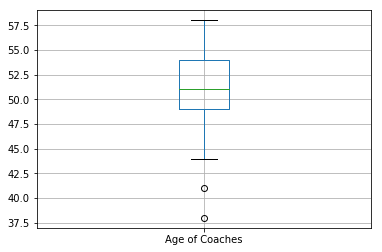

In [112]:
boxplot = Ages.boxplot(column=['Age of Coaches'])

So this is the boxplot showing the distribution of the ages of all coaches of the season and then the median is a value between 50 years and 55 years.

# [RQ4] Find the top 10 players with the highest ratio between completed passes and attempted passes.

In [113]:
with open(r"C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Spain.json") as myfile :
    data = myfile.read()
events = pd.DataFrame(json.loads(data))


since in this RQ we are just interested in "pass" events, we filter the rows that has eventId=8

In [114]:
pass_events = events[events.eventId == 8]
pass_events

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.994582,180864419,2565548,1H,3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",85,Simple pass,[{'id': 1801}],682
1,8,Pass,3.137020,180864418,2565548,1H,274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",85,Simple pass,[{'id': 1801}],682
2,8,Pass,6.709668,180864420,2565548,1H,364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",85,Simple pass,[{'id': 1801}],682
3,8,Pass,8.805497,180864421,2565548,1H,3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",85,Simple pass,[{'id': 1801}],682
4,8,Pass,14.047492,180864422,2565548,1H,3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",85,Simple pass,[{'id': 1801}],682
5,8,Pass,18.480831,180864423,2565548,1H,3277,"[{'y': 37, 'x': 31}, {'y': 83, 'x': 37}]",85,Simple pass,[{'id': 1801}],682
6,8,Pass,23.978291,180864424,2565548,1H,3695,"[{'y': 83, 'x': 37}, {'y': 53, 'x': 13}]",85,Simple pass,[{'id': 1801}],682
7,8,Pass,28.831334,180864425,2565548,1H,3486,"[{'y': 53, 'x': 13}, {'y': 41, 'x': 33}]",85,Simple pass,[{'id': 1801}],682
8,8,Pass,30.844379,180864426,2565548,1H,3277,"[{'y': 41, 'x': 33}, {'y': 79, 'x': 33}]",85,Simple pass,[{'id': 1801}],682
9,8,Pass,34.267339,180864427,2565548,1H,3695,"[{'y': 79, 'x': 33}, {'y': 98, 'x': 54}]",85,Simple pass,[{'id': 1801}],682


Now we want to know about accurate passes so we filter rows that contain tag id 1801

In [115]:
acc_passes = pass_events[pass_events['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(1801).any())]

In [116]:
acc_passes.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.994582,180864419,2565548,1H,3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",85,Simple pass,[{'id': 1801}],682
1,8,Pass,3.137020,180864418,2565548,1H,274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",85,Simple pass,[{'id': 1801}],682
2,8,Pass,6.709668,180864420,2565548,1H,364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",85,Simple pass,[{'id': 1801}],682
3,8,Pass,8.805497,180864421,2565548,1H,3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",85,Simple pass,[{'id': 1801}],682
4,8,Pass,14.047492,180864422,2565548,1H,3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",85,Simple pass,[{'id': 1801}],682


Now we calculate the ratio of accurate passes

In [117]:
ratio = ( acc_passes["playerId"].value_counts() / pass_events["playerId"].value_counts() ).sort_values(ascending=[False])
ratio

568583    1.000000
400564    1.000000
545811    1.000000
6925      1.000000
3672      1.000000
257752    1.000000
329026    1.000000
352985    1.000000
357992    1.000000
367391    1.000000
519496    0.975610
279566    0.952381
7860      0.950331
86200     0.950000
256634    0.947368
279538    0.943489
70120     0.941735
32793     0.939394
69404     0.937581
266312    0.937500
122832    0.937500
14723     0.936670
26307     0.935149
326523    0.934844
25397     0.933723
247212    0.931507
3372      0.925000
99        0.923077
3788      0.922563
499843    0.921569
            ...   
6165      0.664151
32968     0.658257
287003    0.656716
279541    0.655172
447821    0.653571
352328    0.652174
253551    0.652174
3599      0.650000
256854    0.642857
278316    0.642857
93000     0.636073
293857    0.634615
3503      0.623037
32601     0.622951
400549    0.620690
3823      0.619048
278383    0.615385
3488      0.615385
3885      0.609524
135903    0.604651
396539    0.600000
279555    0.

As you can see some of our rows have value 1. lets evaluate one of this points :

In [119]:
print(acc_passes["playerId" ].value_counts()[568583])
print(pass_events["playerId" ].value_counts()[568583])

3
3


This player had only 2 passes and all of them were accurate so we can't judge whether he is a good palyer or not based on this information. Now we put a threshhold to solve this problem. for setting a threshold, it's good to have an initial understanding of our data:






In [120]:
pass_events["playerId"].value_counts().describe()

count     557.000000
mean      572.211849
std       507.659390
min         1.000000
25%       139.000000
50%       447.000000
75%       875.000000
max      2417.000000
Name: playerId, dtype: float64

As you can see the first quartile is 157 and it means that 75% of our population had more than 157 passes, also the mean is 639, so it seems fair to set the threshold equal to 157. let's see :

In [121]:
countA = pass_events.playerId.value_counts()
countB = countA[countA.apply(lambda x : x > 157)]
countB.head(10)

3476      2417
3676      2396
364860    2338
3286      2153
3269      2089
3346      2068
3280      2038
346195    2034
26307     2020
167641    1989
Name: playerId, dtype: int64

Now, I calculate the ratio :

In [122]:
rate = (acc_passes["playerId"].value_counts()/ countB).sort_values(ascending=[False]).dropna()
rate[0:10]

7860      0.950331
256634    0.947368
279538    0.943489
70120     0.941735
69404     0.937581
14723     0.936670
26307     0.935149
326523    0.934844
25397     0.933723
3788      0.922563
Name: playerId, dtype: float64

In [123]:
ratio = pd.DataFrame({"wyId": rate.index , "ratio" : rate.values})
ratio.head(10)

,wyId,ratio
0,7860,0.950331
1,256634,0.947368
2,279538,0.943489
3,70120,0.941735
4,69404,0.937581
5,14723,0.936670
6,26307,0.935149
7,326523,0.934844
8,25397,0.933723
9,3788,0.922563


We can also extract the name of these players

In [124]:
ratio ["Last name"] = ratio.merge(players, on = "wyId")["lastName"]

In [125]:
ratio.head(10)

,wyId,ratio,Last name
0,7860,0.950331,Vermaelen
1,256634,0.947368,Mina Gonz\u00e1lez
2,279538,0.943489,Llorente Moreno
3,70120,0.941735,Garc\u00eda Fern\u00e1ndez
4,69404,0.937581,Kova\u010di\u0107
5,14723,0.936670,Kroos
6,26307,0.935149,Mandi
7,326523,0.934844,Ceballos Fern\u00e1ndez
8,25397,0.933723,Umtiti
9,3788,0.922563,Amat Maas


# [RQ5] Does being a tall player mean winning more air duels?

in this RQ we want to know if there is any ralations between the height of a player and winning air duels or not. We need to work on England event dataset to extract data about air duels and also players dataset to extract data about the height of players

In [126]:
with open(r"C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Spain.json") as myfile :
    data = myfile.read()
events = pd.DataFrame(json.loads(data))

In [128]:
with open(r"C:\Users\Notebook HP\Desktop\Homeworks\HW2\players.json") as myfile :
    data = myfile.read()
players = pd.DataFrame(json.loads(data))

since we want to focus on air duel events, we should filter the rows of our dataframe to the ones with subEventId = 10

In [129]:
AirDuels = events[events.subEventId == 10]
AirDuels

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
73,1,Duel,328.019699,180864471,2565548,1H,15214,"[{'y': 50, 'x': 11}, {'y': 89, 'x': 77}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
74,1,Duel,328.224232,180864470,2565548,1H,274435,"[{'y': 89, 'x': 77}, {'y': 84, 'x': 5}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
75,1,Duel,328.251303,180864607,2565548,1H,255738,"[{'y': 50, 'x': 89}, {'y': 16, 'x': 95}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",695
101,1,Duel,413.607756,180864654,2565548,1H,247220,"[{'y': 61, 'x': 91}, {'y': 51, 'x': 95}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",695
102,1,Duel,413.727707,180864480,2565548,1H,3277,"[{'y': 39, 'x': 9}, {'y': 49, 'x': 5}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",682
163,1,Duel,691.675740,180864716,2565548,1H,255738,"[{'y': 22, 'x': 37}, {'y': 53, 'x': 27}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",695
164,1,Duel,691.826623,180864517,2565548,1H,274435,"[{'y': 78, 'x': 63}, {'y': 47, 'x': 73}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
168,1,Duel,720.912005,180864520,2565548,1H,274435,"[{'y': 13, 'x': 64}, {'y': 12, 'x': 71}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
169,1,Duel,721.108013,180864718,2565548,1H,3919,"[{'y': 87, 'x': 36}, {'y': 88, 'x': 29}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",695
177,1,Duel,760.053162,180864524,2565548,1H,3277,"[{'y': 35, 'x': 19}, {'y': 62, 'x': 22}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682


since we want to calculate the rate of winning duels the next step is to filter the rows with tag Id = 1801 (I consider both won and neutral duels)

In [130]:
acc_duel = AirDuels[AirDuels["tags"].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(1801).any())]
acc_duel

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
73,1,Duel,328.019699,180864471,2565548,1H,15214,"[{'y': 50, 'x': 11}, {'y': 89, 'x': 77}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
74,1,Duel,328.224232,180864470,2565548,1H,274435,"[{'y': 89, 'x': 77}, {'y': 84, 'x': 5}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
101,1,Duel,413.607756,180864654,2565548,1H,247220,"[{'y': 61, 'x': 91}, {'y': 51, 'x': 95}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",695
164,1,Duel,691.826623,180864517,2565548,1H,274435,"[{'y': 78, 'x': 63}, {'y': 47, 'x': 73}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
168,1,Duel,720.912005,180864520,2565548,1H,274435,"[{'y': 13, 'x': 64}, {'y': 12, 'x': 71}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
177,1,Duel,760.053162,180864524,2565548,1H,3277,"[{'y': 35, 'x': 19}, {'y': 62, 'x': 22}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
192,1,Duel,803.224129,180864534,2565548,1H,3277,"[{'y': 83, 'x': 82}, {'y': 14, 'x': 6}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
197,1,Duel,841.315942,180864755,2565548,1H,213124,"[{'y': 25, 'x': 30}, {'y': 23, 'x': 55}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",695
225,1,Duel,945.623901,180864566,2565548,1H,3277,"[{'y': 41, 'x': 10}, {'y': 42, 'x': 10}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
238,1,Duel,1002.972392,180864582,2565548,1H,3534,"[{'y': 6, 'x': 30}, {'y': 23, 'x': 30}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682


we should set a threshold to ignore data that may lead us to misjudgment(in this case players that had very low total air duels). For setting the threshold, we should have a basic understanding of our data. So I use describe function on total count of Airduels for each player.

In [131]:
duelCount = AirDuels["playerId"].value_counts()
duelCount.describe()

count     533.000000
mean       57.819887
std       120.389880
min         1.000000
25%        13.000000
50%        37.000000
75%        79.000000
max      2524.000000
Name: playerId, dtype: float64

the first interval is 17 and by setting it as a threshold we're gonna ignore 25% of our population I'm goona set the thershold a little bit less than the first quartile to see what would happen. t =13

In [132]:
duelCount2 = duelCount[duelCount.apply(lambda x : x >13)]

In [133]:
ratio = (acc_duel["playerId"].value_counts() / duelCount2).sort_values(ascending=[False]).dropna()
ratio                                                                     

3428      1.000000
3458      1.000000
3296      1.000000
140046    0.950000
3330      0.937500
3719      0.933333
3963      0.884615
86319     0.850000
8200      0.833333
344132    0.800000
282448    0.800000
125250    0.789474
26518     0.789474
69409     0.787500
4003      0.785714
7302      0.782051
3335      0.777778
3309      0.770000
3434      0.766667
3341      0.762295
20406     0.761905
25452     0.758621
41363     0.758621
4358      0.757143
25397     0.755814
8311      0.755556
208694    0.755319
227894    0.754902
93003     0.751825
29642     0.750000
            ...   
450784    0.312500
3423      0.296296
86307     0.294118
3682      0.293478
254408    0.293103
14836     0.293103
239843    0.291667
3708      0.291667
293857    0.285714
4683      0.285714
4131      0.264151
50461     0.263158
3843      0.256410
25795     0.253012
280383    0.240000
4440      0.233333
25445     0.232558
261127    0.227273
226005    0.222222
3287      0.218487
278289    0.216216
22578     0.

Let's extract the number of total air duels that 2 players with ratio of 1 had

In [135]:
print(duelCount[3428])
print(duelCount[3458])

15
22


since the mean of total air duels is 76,I think it is fair to ignore players who had less than 19 air duels. So I'm gonna increase my threshold to 19.

In [136]:
duelCount3 = duelCount[duelCount.apply(lambda x : x >19)]

In [137]:
duelCount3 = duelCount[duelCount.apply(lambda x : x >19)]
ratio = (acc_duel["playerId"].value_counts() / duelCount3).sort_values(ascending=[False]).dropna()


Now it's time to make a plot. before plotting, I put all the data that we need for creating a plot in a dataframe

In [138]:
info = pd.DataFrame({'wyId' :ratio.index , 'ratio' : ratio.values})
info.head()

,wyId,ratio
0,3458,1.000000
1,140046,0.950000
2,3963,0.884615
3,86319,0.850000
4,8200,0.833333


In [139]:
info ["height"] = info.merge(players, on = "wyId")["height"]


In [140]:
info

,wyId,ratio,height
0,3458,1.000000,194.0
1,140046,0.950000,194.0
2,3963,0.884615,187.0
3,86319,0.850000,185.0
4,8200,0.833333,196.0
5,125250,0.789474,186.0
6,26518,0.789474,182.0
7,69409,0.787500,181.0
8,7302,0.782051,192.0
9,3335,0.777778,184.0


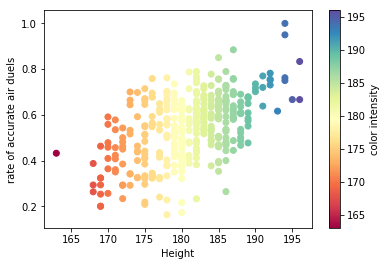

In [141]:
y = info["ratio"]
x = info["height"]
plt.xlabel("Height")
plt.ylabel("rate of accurate air duels")
plt.scatter(x,y , c = info["height"], cmap = 'Spectral' )
cbar = plt.colorbar()
cbar.set_label('color intensity')

As we can see in the scatter plot, as the value of height increases, the value of rate of accurate air duels tend to increase. So there is a positive relationship between these 2 variables